## Installing Deep AutoVIML


In [1]:
!pip install deep_autoviml
!pip install kaggle
!pip install split-folders tqdm

## Loading the image data

In [5]:
!mv kaggle.json ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d maysee/mushrooms-classification-common-genuss-images

100% 1.85G/1.85G [00:19<00:00, 126MB/s]
100% 1.85G/1.85G [00:19<00:00, 99.9MB/s]


In [7]:
!unzip /content/mushrooms-classification-common-genuss-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: mushrooms/Mushrooms/Boletus/0622_axDS6XbWq14.jpg  
  inflating: mushrooms/Mushrooms/Boletus/0623_rGwoTDghdAY.jpg  
  inflating: mushrooms/Mushrooms/Boletus/0624_RmlDHXvJUeU.jpg  
  inflating: mushrooms/Mushrooms/Boletus/0625_zqKe97TlLiA.jpg  
  inflating: mushrooms/Mushrooms/Boletus/0626_Vr79bfyR04Q.jpg  
  inflating: mushrooms/Mushrooms/Boletus/0627_eN6cXmAY_WM.jpg  
  inflating: mushrooms/Mushrooms/Boletus/0628_HgADwtCnaLg.jpg  
  inflating: mushrooms/Mushrooms/Boletus/0629_vlmH59caIwg.jpg  
  inflating: mushrooms/Mushrooms/Boletus/0630_dhxHhToh_80.jpg  
  inflating: mushrooms/Mushrooms/Boletus/0631_PJXNFQZc7n8.jpg  
  inflating: mushrooms/Mushrooms/Boletus/0632_Rc_3hYDbYqU.jpg  
  inflating: mushrooms/Mushrooms/Boletus/0633_0hFXcQuG57k.jpg  
  inflating: mushrooms/Mushrooms/Boletus/0634_T00gs2bFUuQ.jpg  
  inflating: mushrooms/Mushrooms/Boletus/0635_-J_6XTsYZMA.jpg  
  inflating: mushrooms/Mushrooms/Boletus/0636_t538mfI

In [8]:
import splitfolders  # or import split_folders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("/content/Mushrooms", output="output", seed=1337, ratio=(.8, .1, .1), group_prefix=None) # default values

Copying files: 6714 files [00:16, 398.57 files/s]


## Model Hyperparameters

In [9]:
BATCHSIZE = 256
CLASSES = 9
EPOCHS = 3
NUM_TRIALS = 5

In [10]:
target = 'image' ### It doesn't matter what name you give for image target
datapath = '/content/output'

In [11]:
image_dir = datapath
img_height = 224
img_width = 224
img_channels = 3
image_dir

'/content/output'

In [12]:
keras_model_type =  "image" ## always try "auto" first, then "basic", "deep", "big deep", "giant deep", "cnn1" etc.
keras_options = {"early_stopping": True, 'lr_scheduler': 'rlr', "epochs": 3}  ### always set early_stopping to True first and then change it to False
model_options = {'tuner':"optuna", "max_trials":2, 'cat_feat_cross_flag':True, 
                 'image_directory': image_dir, 'image_height': img_height, 
                 'image_width':img_width, 'image_channels':img_channels }
## always set the tuner to "storm" first and then "optuna"
#### You always need 15 max_trials to get something decent #####

In [14]:
from deep_autoviml import deep_autoviml as deepauto


Imported deep_auto_viml. version=0.0.67
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


    Only CPU found on this device
Setting CPU strategy using 1 devices
    Image directory given as /content/output
For image use case:
    Image height given as 224
    Image width given as 224
    Image channels given as 3
No validation folder found under given image directory /content/output. Returning...
Found 5367 files belonging to 9 classes.

Splitting train into two: train and validation data
Number of image classes = 9 and they are: ['Agaricus', 'Amanita', 'Boletus', 'Cortinarius', 'Entoloma', 'Hygrocybe', 'Lactarius', 'Russula', 'Suillus']
Training image model. This will take time...
Epoch 1/3
42/42 [==============================] - 176s 4s/step - loss: 1.9476 - accuracy: 0.3098 - val_loss: 1.4814 - val_accuracy: 0.5119
Epoch 2/3
42/42 [==============================] - 99s 2s/step - loss: 1.3534 - accuracy: 0.5401 - val_loss: 1.1842 - val_accuracy: 0.6121
Epoch 3/3
17/17 [==============================] - 29s 2s/step - loss: 1.0490 - accuracy: 0.6581
    Model accuracy in I

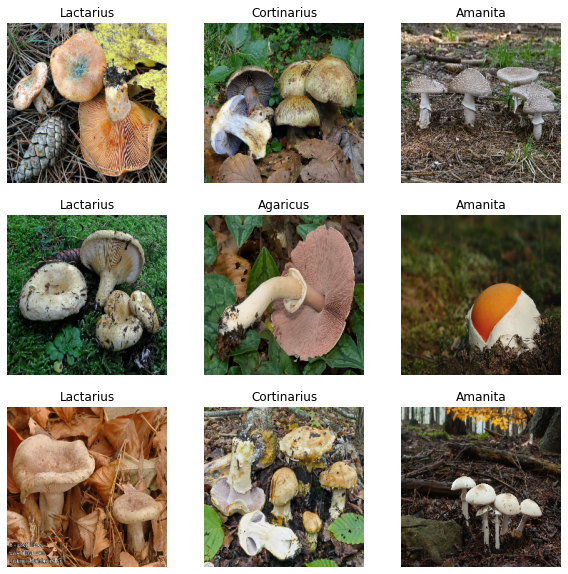

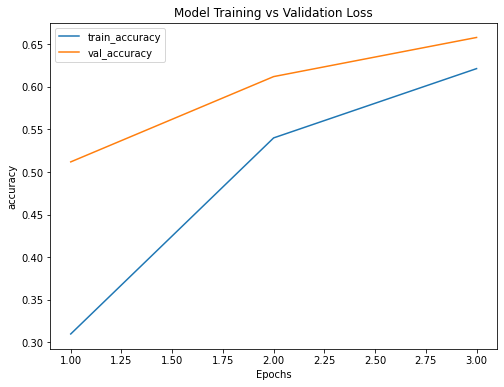

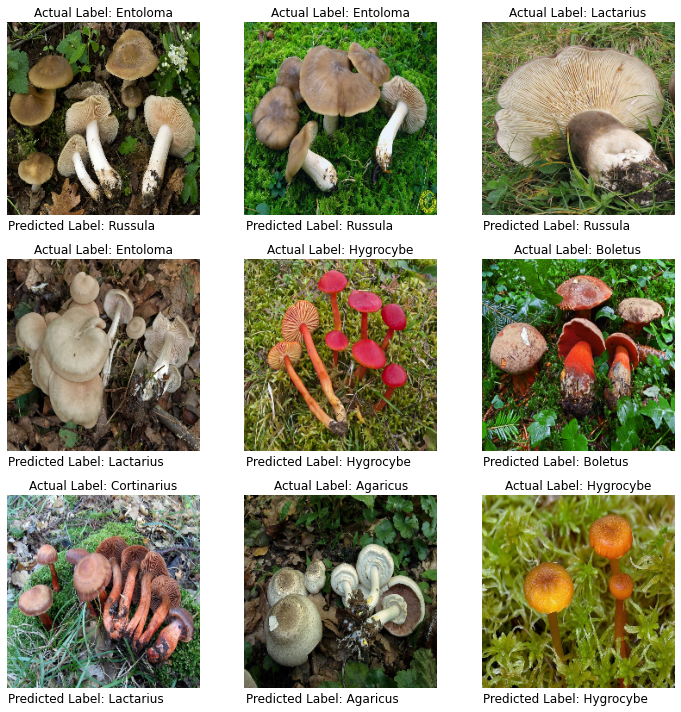

In [15]:
model, dicti = deepauto.fit("", 
                            target, 
                            keras_model_type=keras_model_type, 
                            project_name='output',
                            save_model_flag=False, 
                            model_options=model_options,model_use_case='', 
                            keras_options=keras_options, 
                            use_my_model='', 
                            verbose=0)

## Model Prediction

In [16]:
test_image_dir = datapath + '/test'
print(test_image_dir)
print(dicti)

predictions = deepauto.predict_images(test_image_dir, model, dicti, keras_model_type)

/content/output/test
{'target_variables': 'target', 'project_name': 'output', 'image_classes': ['Agaricus', 'Amanita', 'Boletus', 'Cortinarius', 'Entoloma', 'Hygrocybe', 'Lactarius', 'Russula', 'Suillus'], 'target_transformed': True, 'modeltype': 'Classification', 'target_le': <deep_autoviml.utilities.utilities.My_LabelEncoder object at 0x7f9e1062c450>, 'image_height': 224, 'image_width': 224, 'batch_size': 64, 'image_channels': 3}

Loading deep_autoviml model from <keras.engine.sequential.Sequential object at 0x7f9e106459d0> folder. This will take time...

Using <keras.engine.sequential.Sequential object at 0x7f9e106459d0> model provided as input...
Time taken to load saved model = 0 seconds
    loading and predicting on folder: /content/output/test
Found 679 files belonging to 9 classes.
    Sample predictions before inverse_transform: [2 2 6 2 6]
    Sample predictions after inverse_transform: ['Boletus' 'Boletus' 'Lactarius' 'Boletus' 'Lactarius']
